# Informe Estadístico Python

Pepe Barbero, Andreu Picornell y Carlos Portillo

Este dataset proporciona información detallada sobre coches usados en venta en distintas ciudades de la India. Contiene datos relevantes que incluyen la marca y modelo del vehículo, el año de fabricación, el tipo de combustible, el tipo de transmisión, la cantidad de kilómetros recorridos, la potencia del motor, y el precio tanto de coches nuevos como usados, entre otros atributos importantes.

# 1. Elección de datos y breve descripción de su naturaleza

In [3]:
import pandas as pd

# Lee el archivo TSV
df = pd.read_csv(r"used_cars_data.csv", sep=",", encoding="latin8")

# Muestra las primeras filas
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


La estructura del dataset es la siguiente:

* **S.No.**: Número de serie.
* **Name**: Nombre del coche que incluye la marca y el modelo.
* **Location**: La ubicación en la que se está vendiendo o está disponible para la compra (ciudades).
* **Year**: Año de fabricación del coche.
* **Kilometers_driven**: El total de kilómetros recorridos por el coche por el/los dueño(s) anterior(es) en KM.
* **Fuel_Type**: El tipo de combustible que usa el coche (Gasolina, Diésel, Eléctrico, CNG, LPG).
* **Transmission**: El tipo de transmisión que usa el coche (Automático/Manual).
* **Owner**: Tipo de propiedad.
* **Mileage**: El kilometraje estándar ofrecido por la empresa del coche en kmpl o km/kg.
* **Engine**: El volumen de desplazamiento del motor en CC.
* **Power**: La potencia máxima del motor en bhp.
* **Seats**: El número de asientos en el coche.
* **New_Price**: El precio de un coche nuevo del mismo modelo en INR Lakhs (1 Lakh = 100,000).
* **Price**: El precio del coche usado en INR Lakhs (1 Lakh = 100,000).

Este conjunto de datos es ideal para el análisis y la construcción de modelos de predicción que permitan estimar el precio de un coche usado basándose en sus características.Dicho análisis nos facilita una mejor comprensión y evaluación del valor de mercado de los coches de segunda mano.



In [4]:
# Extraer la primera palabra de la columna 'Name' como la marca del coche
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Mostrar las primeras filas con la nueva columna 'Brand'
df[['Name', 'Brand']].head()


,Name,Brand
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi


Creamos una nueva columna llamada 'Brand', en la cual extraemos la primera palabra de la columna ya existente 'Name'. De esta forma, podemos encontrar cuál es la marca de cada uno de los modelos.



### Sacar la media del precio

In [5]:
df.loc[:, 'Price'].dropna().describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [6]:
df.loc[:, 'Price'].dropna().mean()

9.47946835022429

Realizamos un análisis inicial de la columna 'Price' para explorar sus características estadísticas básicas. Primero eliminamos valores nulos con .dropna(), asegurando la calidad de los datos. Luego usamos .describe() para obtener métricas clave como la media, mediana, desviación estándar, y los valores mínimo, máximo y cuartiles. También calculamos la media con .mean() para confirmar el promedio de los precios.

Este análisis permite comprender la distribución de los precios, identificar valores atípicos y medir la tendencia central y dispersión de los datos, sentando las bases para un análisis estadístico más profundo.

# 2. Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo

## Box-Whiskers

<Axes: >

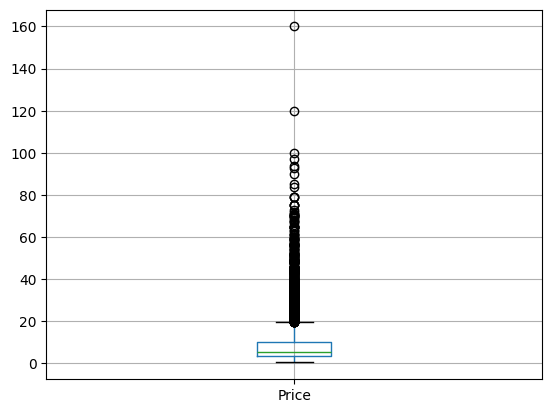

In [7]:
df.boxplot(column=['Price'])

Este boxplot sobre la columna 'Price' refleja la distribución estadística de los precios y complementa los resultados del análisis descriptivo realizado anteriormente. A continuación, se detalla lo observado:

**Distribución de los datos principales:** La mayor parte de los valores de 'Price' se encuentran concentrados entre los rangos del primer cuartil (3.5) y el tercer cuartil (9.95), lo que coincide con el rango intercuartílico calculado en el análisis previo. La mediana (percentil 50) se sitúa en aproximadamente 5.64, lo que confirma que los datos están sesgados hacia precios más bajos.

**Valores atípicos:** El gráfico revela una gran cantidad de valores atípicos que se extienden más allá de los bigotes superiores (por encima de 9.95) y alcanzan hasta el valor máximo de 160. Estos valores extremos indican que existen precios significativamente altos que podrían distorsionar algunas métricas como la media.

**Dispersión de los datos:** La longitud de los bigotes y la concentración de valores dentro de la caja reflejan que los precios tienen una distribución asimétrica, donde la mayoría de los datos están en rangos bajos, mientras que una proporción menor se extiende hacia valores más altos.

**Relación con el análisis estadístico previo:** La media calculada (9.48) se encuentra cerca del tercer cuartil, lo que refuerza la presencia de sesgo hacia valores altos debido a los outliers. El boxplot visualiza claramente la dispersión observada en la desviación estándar (11.18) y confirma la necesidad de analizar con mayor detalle los valores atípicos para determinar si representan casos válidos o errores.

## Número de coches por marca

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Name: count, dtype: int64


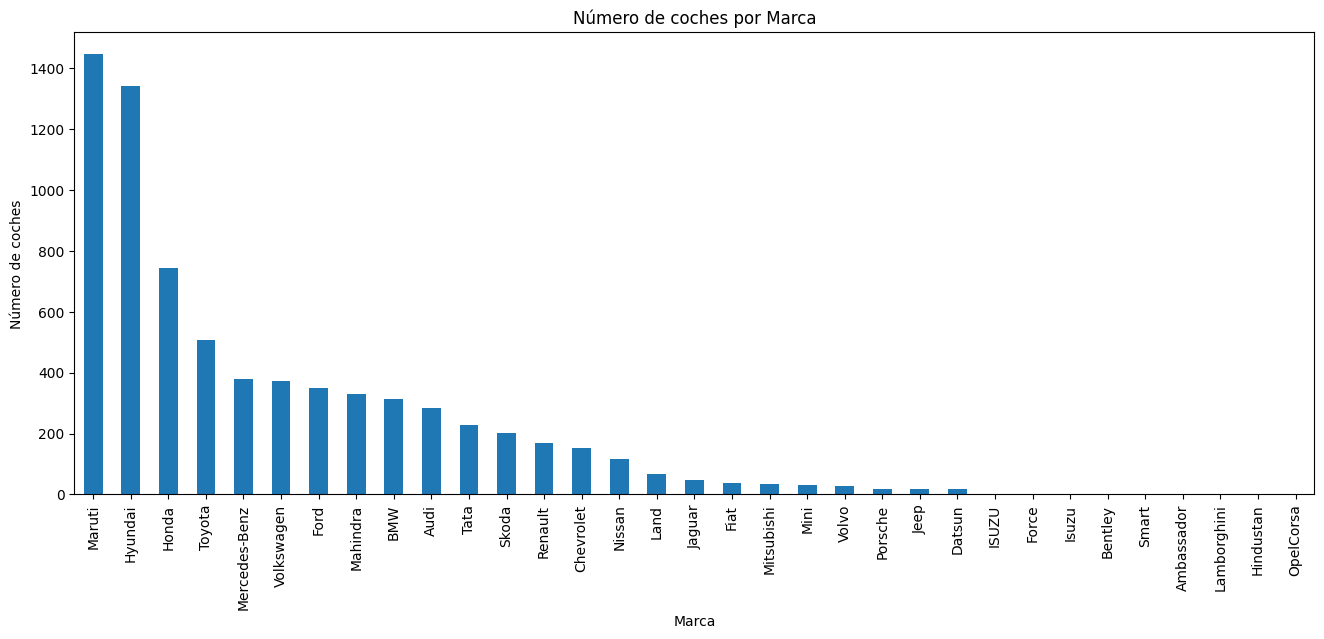

In [8]:
import matplotlib.pyplot as plt

brand_counts = df['Brand'].value_counts()
print(brand_counts.head())

brand_counts.plot(kind='bar', figsize=(16, 6))
plt.title('Número de coches por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de coches')
plt.xticks(rotation=90)
plt.show()


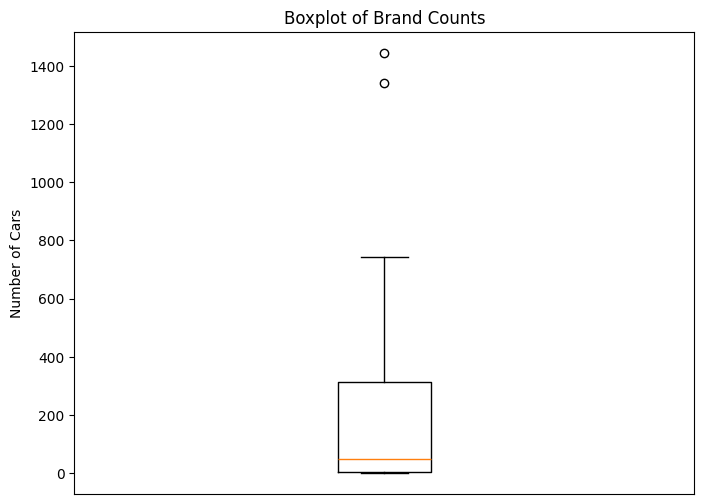

In [9]:
import matplotlib.pyplot as plt

# Extract values from the brand_counts Series
brand_counts_values = brand_counts.values

# Create the boxplot using matplotlib directly
plt.figure(figsize=(8, 6))
plt.boxplot(brand_counts_values)
plt.title('Boxplot of Brand Counts')
plt.ylabel('Number of Cars')
plt.xticks([])  # Remove x-axis ticks since they are not relevant here
plt.show()

Descripción del gráfico de barras: "Número de coches por marca"

Este gráfico de barras muestra la cantidad de coches disponibles agrupados por marca. Los puntos clave son los siguientes:

**Distribución de las marcas:** Las marcas Maruti y Hyundai son las que cuentan con el mayor número de modelos, con más de 1,400 coches registrados cada una. Le siguen marcas como Honda, Toyota, y Mercedes-Benz, con un número de modelos significativamente menor pero aún destacable.
Las marcas menos representadas, como Jaguar, Lamborghini, y Bentley, tienen muy pocos coches en comparación, lo que podría indicar una oferta más exclusiva o especializada.

**Relación con el análisis previo:** Este análisis refuerza la necesidad de segmentar los datos por marcas, dado que algunas dominan el mercado con una alta representación, mientras que otras tienen una representación marginal. 

Descripción del Boxplot: "Boxplot de número de coches por marca"

El boxplot proporciona un resumen visual de la distribución de los modelos por marca y complementa el gráfico de barras al mostrar la dispersión de las marcas con menos modelos. Observaciones clave:

**Rango intercuartílico (IQR):** La mayoría de las marcas tienen menos de 200 modelos, ya que el rango intercuartílico está muy concentrado en valores bajos. La mediana (línea naranja) está cerca de 100 modelos por marca, lo que indica que la mayoría de las marcas tienen una oferta moderada.

**Valores atípicos:** Marcas como Maruti y Hyundai son valores atípicos significativos que se encuentran fuera del rango esperado, al contar con un número de modelos excepcionalmente alto en comparación con otras marcas.
Relación con el análisis previo:

Este gráfico refuerza la idea de que unas pocas marcas dominan en términos de volumen, mientras que la mayoría tiene una representación más limitada. Esto es importante para futuros análisis, como estudiar si esta dominancia impacta en el precio promedio.

## Correlación de los caballos, el precio, el año, los kilometros conducidos

In [10]:
df['power'] = df['Power'].str.extract('(\d+)').astype(float)

selected_columns = df[['Price', 'Year','Kilometers_Driven', 'power']]
corr_matrix = selected_columns.corr(method='pearson')
corr_matrix


,Price,Year,Kilometers_Driven,power
Price,1.000000,0.305327,-0.011493,0.772480
Year,0.305327,1.000000,-0.187859,0.012439
Kilometers_Driven,-0.011493,-0.187859,1.000000,0.030463
power,0.772480,0.012439,0.030463,1.000000


En esta parte se ha realizado una matriz de correlación de la que podemos extraer las siguientes conclusiones:

* **Price vs. power (0.772)**

Existe una correlación positiva alta entre el precio y la potencia (power). Esto sugiere que, en general, a mayor potencia del vehículo, mayor es el precio. Este resultado es lógico, ya que los vehículos con motores más potentes suelen tener un precio más alto debido a su mejor desempeño y características avanzadas.

* **Price vs. Year (0.305)** -> Hacer una comparación por antigüedad

La correlación positiva moderada entre el precio y el año del vehículo sigue presente, indicando que los vehículos más nuevos tienden a tener un precio más alto, aunque otros factores también podrían influir en esta relación.

* **Price vs. Kilometers_Driven (-0.011)**

La correlación entre el precio y los kilómetros recorridos sigue siendo muy baja, lo que implica que en tu conjunto de datos, la cantidad de kilómetros recorridos no es un factor significativo para el precio del vehículo.


# 3. Comprobación de la normalidad de alguna/s variable/s del conjunto de datos


## Distribución del precio

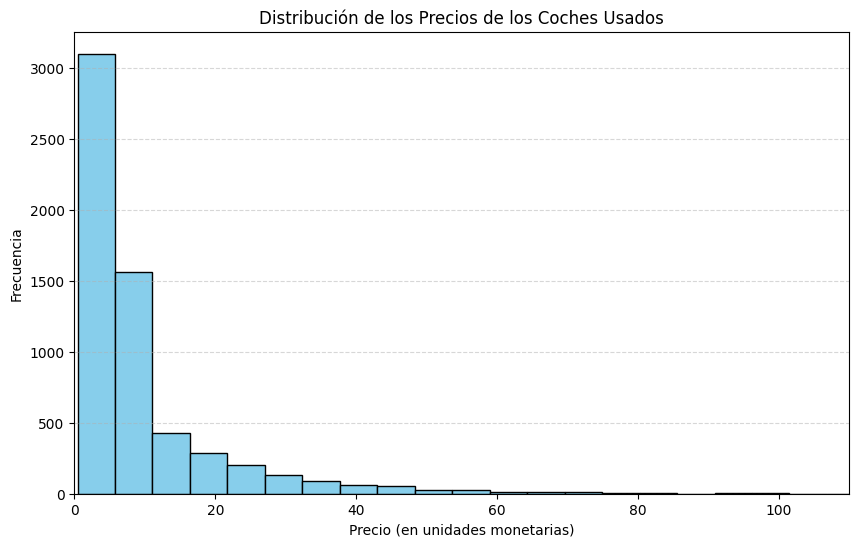

In [11]:
import matplotlib.pyplot as plt

# Limpiar los datos eliminando valores nulos de la columna 'Price'
df['Price'] = df['Price'].dropna()

# Graficar un histograma de la columna 'Price'
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Precios de los Coches Usados')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 110)
plt.show()



Descripción del Histograma: Distribución de los Precios de los Coches Usados

El histograma presentado ilustra la distribución de los precios de los coches usados en el conjunto de datos. A continuación, se detallan los puntos clave observados:

**1. Concentración de precios bajos:** La mayor parte de los coches se encuentran en el rango de precios bajos, específicamente entre 0 y 20 unidades monetarias. Esto se evidencia por las barras iniciales del histograma, que representan frecuencias muy altas, especialmente en el primer intervalo (0-10).
Más de 3,000 coches están en el rango más bajo, lo que refleja un mercado predominantemente accesible.

**2. Disminución progresiva de frecuencias:** A medida que aumentan los precios, la frecuencia de coches disminuye drásticamente. Los coches con precios superiores a 40 unidades monetarias son mucho menos frecuentes. A partir de 60 unidades monetarias, la presencia de coches es prácticamente marginal, lo que indica que los coches de alta gama son una minoría en el mercado analizado.

**3. Relación con análisis previo:** El análisis estadístico previo (media, mediana y cuartiles) y el boxplot ya sugerían una distribución sesgada hacia valores bajos. Este histograma lo confirma, destacando que la mayoría de los precios están en el rango más accesible.
Los valores atípicos observados en el boxplot corresponden a los coches representados en los intervalos más altos del histograma (precios superiores a 60 unidades).

In [12]:
from scipy import stats

dist_names = ['norm', 'expon', 'gamma']
best_fit = {}
prices = df['Price'].dropna()

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(prices)
    best_fit[dist_name] = stats.kstest(prices, dist_name, args=param).statistic

print("Mejor ajuste:", min(best_fit, key=best_fit.get))

Mejor ajuste: expon


Cuando queremos analizar un conjunto de datos, como los precios, es útil encontrar una distribución matemática que se ajuste bien a ellos. Para lograrlo, probamos con varias distribuciones comunes, como la normal, exponencial y gamma. Utilizamos una técnica llamada ajuste de distribuciones, que modifica los parámetros de cada fórmula matemática para que se parezca lo más posible a los datos reales.

Para evaluar qué tan bien se ajusta cada distribución, usamos una prueba estadística conocida como Kolmogorov-Smirnov (KS). Esta prueba compara la forma teórica de cada distribución con la forma real de los datos y produce un número, llamado estadístico KS. Cuanto menor sea este número, mejor se ajusta esa distribución a los datos.

En este caso, al probar las distribuciones normal, exponencial y gamma, encontramos que la distribución exponencial tiene el estadístico KS más bajo. Esto significa que, de las opciones evaluadas, la exponencial es la que mejor representa la forma de los datos de precios.

Esto tiene sentido si consideramos la naturaleza de los datos. La distribución exponencial es conocida por concentrar muchos valores en el rango bajo y luego tener una cola que decrece hacia los valores más altos. Este patrón coincide con los datos de precios, donde hay muchos valores bajos y pocos valores altos. Por eso, la distribución exponencial es la mejor elección para modelar este conjunto de datos.

In [13]:
from scipy.stats import expon

# Parámetro de la distribución (1/lambda)
beta = 2  # media de la distribución exponencial

# Calcular la probabilidad de que la variable tome un valor <= x
x = 3  # ejemplo de valor
probabilidad = expon.cdf(x, scale=beta)

print(f"La probabilidad de que la variable tome un valor menor o igual a {x} es: {probabilidad:.4f}")

La probabilidad de que la variable tome un valor menor o igual a 3 es: 0.7769


La distribución exponencial tiene una tasa de caída rápida, lo que significa que las probabilidades para valores pequeños (𝑥) son altas y decrecen exponencialmente a medida que x aumenta. Para 𝑥 = 3, la probabilidad de 0.7769 refleja que la mayor parte de los valores se concentran cerca del origen, lo que coincide con la naturaleza de esta distribución.

## Distribución de los km de los coches

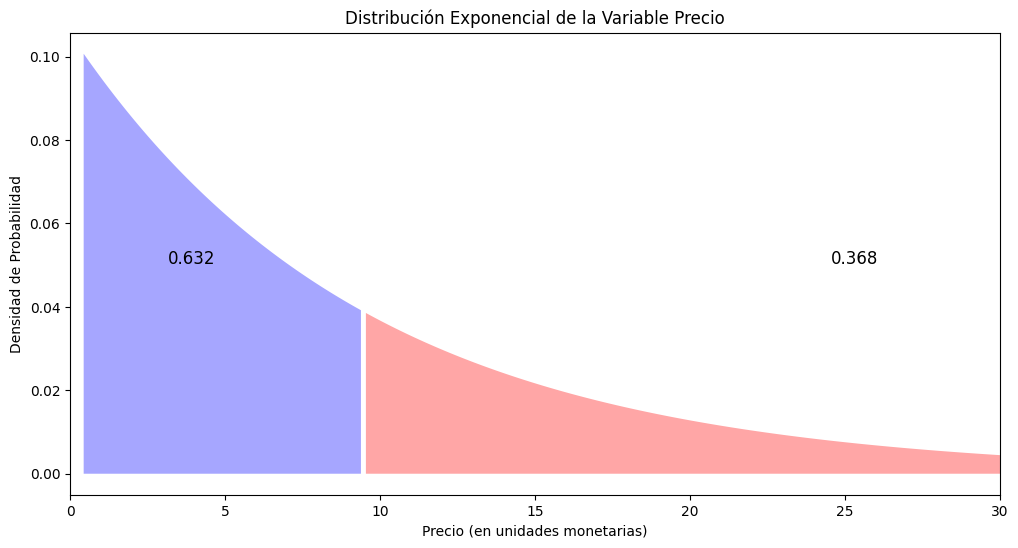

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ajustar una distribución exponencial a la variable 'Price'
precio = df['Price'].dropna()  # Eliminar valores nulos para evitar errores
lambda_param = 1 / precio.mean()  # Parámetro de la distribución exponencial (1/media)

# Definir los rangos de la gráfica
x = np.linspace(0.440000, precio.max(), 1000)

# Calcular la función de densidad de probabilidad (PDF) de la distribución exponencial
pdf = lambda_param * np.exp(-lambda_param * x)

# Graficar las áreas
plt.figure(figsize=(12, 6))

# Calculate the where condition separately to ensure it matches the shape of x
where_below_mean = x <= precio.mean()

# Use the where condition in fill_between
plt.fill_between(x=x,  # Use the full x array
                 y1=pdf,  # Use the full pdf array
                 where=where_below_mean,  # Apply the where condition for below mean
                 facecolor='blue',
                 alpha=0.35)

# Similarly for above mean
where_above_mean = x > precio.mean()
plt.fill_between(x=x,
                 y1=pdf,
                 where=where_above_mean,
                 facecolor='red',
                 alpha=0.35)

# Agregar texto a la gráfica
prob_1 = stats.expon.cdf(precio.mean(), scale=1/lambda_param)
plt.text(x=precio.mean()/3, y=pdf.max()/2, s=f"{round(prob_1, 3)}", fontsize=12)
plt.text(x=precio.mean() + (precio.max() - precio.mean()) * 0.1, 
         y=pdf.max() / 2, 
         s=f"{round(1 - prob_1, 3)}", 
         fontsize=12)


# Personalizar la gráfica
plt.title('Distribución Exponencial de la Variable Precio')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(0,30)
plt.show()


# 4. Estimación puntual y por intervalos de los parámetros poblacionales de algunas variables.


### Estimación puntual y por intervalos de los Kilometros conducidos

- **Estimación puntual.** Para la estimación puntual, utilizamos las medias y otras medidas estadísticas de las variables de interés.

In [15]:
# Estimación puntual de la media de Kilometers_Driven
mean_km_driven = df['Kilometers_Driven'].mean()

# Estimación puntual de la desviación estándar de Kilometers_Driven
std_km_driven = df['Kilometers_Driven'].std()

print(f"Media de Kilometers Driven: {mean_km_driven}")
print(f"Desviación estándar de Kilometers Driven: {std_km_driven}")

Media de Kilometers Driven: 58699.063146284294
Desviación estándar de Kilometers Driven: 84427.72058265151


- **Estimación por intervalos de confianza.** Para obtener un intervalo de confianza para las medias, utilizamos una distribución t de Student, dado que la muestra es finita y la desviación estándar poblacional es desconocida.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Tamaño de la muestra
n = len(df['Kilometers_Driven'])

# Nivel de confianza (95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Calcular el intervalo de confianza
t_value = stats.t.ppf(1 - alpha/2, df=n-1)  # valor crítico t de Student
margin_of_error = t_value * (std_km_driven / np.sqrt(n))

# Intervalo de confianza
lower_bound = mean_km_driven - margin_of_error
upper_bound = mean_km_driven + margin_of_error

print(f"Intervalo de confianza al 95% para Kilometers Driven: ({lower_bound}, {upper_bound})")

Intervalo de confianza al 95% para Kilometers Driven: (56755.732021876975, 60642.39427069161)


# 5. Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos

En este análisis se realiza una **prueba t de una muestra** para comparar la media de la columna **'Price'** (Precio) con un valor hipotético.

- **Hipótesis nula (H₀)**: La media de la columna **'Price'** es igual al valor hipotético de **10**.

  \[
  H₀: \mu = 10
  \]

- **Hipótesis alternativa (H₁)**: La media de la columna **'Price'** es diferente al valor hipotético de **10**.

  \[
  H₁: \mu \neq 10
  \]

El valor de la t-Estadística y el p-Valor nos permiten evaluar si podemos rechazar la hipótesis nula:

- Si el **p-valor** es menor que 0.05 (nivel de significancia), rechazamos la hipótesis nula, lo que indica que la media de la columna **'Price'** es significativamente diferente al valor hipotético de **10**.
- Si el **p-valor** es mayor o igual a 0.05, no hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que la media de la columna **'Price'** no es significativamente diferente del valor hipotético.

Este tipo de prueba es útil para realizar inferencias sobre la media de una muestra en comparación con un valor previamente establecido.

In [18]:
from scipy import stats

# Definir la muestra (por ejemplo, la columna 'Price')
muestra = df['Price'].dropna()  # Eliminar valores nulos

# Valor hipotético de la media (por ejemplo, 10)
media_hipotetica = 10

# Realizar la prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(muestra, media_hipotetica)

# Imprimir los resultados
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretación básica
if p_value < 0.05:
    print("Hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra es significativamente diferente al valor hipotético.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra no es significativamente diferente al valor hipotético.")

T-Statistic: -3.609608265636996
P-Value: 0.0003091532375662232
Hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra es significativamente diferente al valor hipotético.


### Distribución t y T-Statistic

En este gráfico se visualiza la **distribución t** de Student con un número determinado de grados de libertad, calculados a partir del tamaño de la muestra utilizada. Además, se marca la **t-Estadística** calculada en la prueba t de una muestra. Esta estadística se compara con la distribución t para determinar si se puede rechazar o no la hipótesis nula.

- **Distribución t**: La línea azul muestra la distribución t teórica para los grados de libertad correspondientes a la muestra.
- **t-Estadística**: La línea roja vertical indica el valor de la t-Estadística obtenida en la prueba. Esta t-Estadística se utiliza para determinar si el valor observado es suficientemente extremo para rechazar la hipótesis nula.
- **Región crítica**: El área sombreada en rojo representa la región crítica de la distribución, que corresponde a los valores de t que exceden los umbrales para rechazar la hipótesis nula. Si la t-Estadística calculada cae dentro de esta región, se rechaza la hipótesis nula.

Este análisis forma parte del proceso de contraste de hipótesis, ayudando a determinar si hay evidencia suficiente para afirmar que la media de la muestra es significativamente diferente de un valor hipotético.


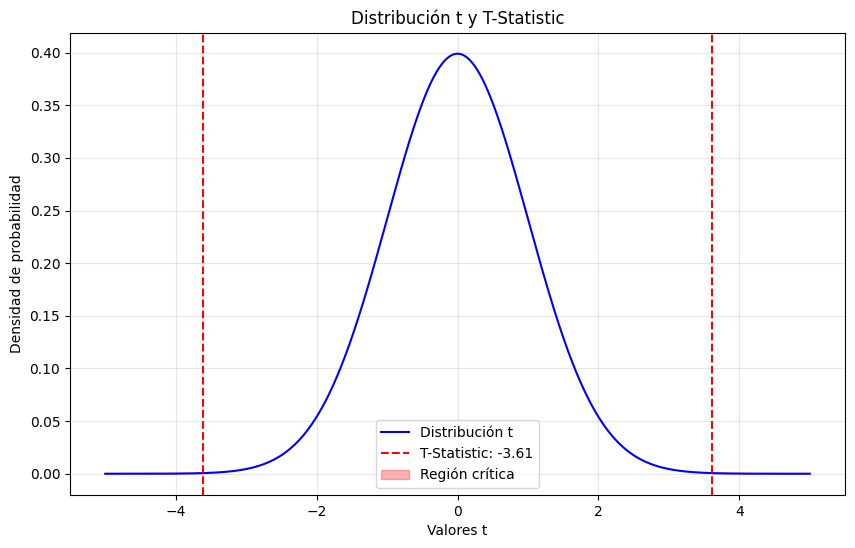

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parámetros de la muestra y la prueba
df_t = len(muestra) - 1  # Grados de libertad
x = np.linspace(-5, 5, 1000)  # Rango para la distribución teórica t

# Calcular la distribución t teórica
t_dist = t.pdf(x, df=df_t)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label="Distribución t", color="blue")  # Distribución t
plt.axvline(x=t_stat, color="red", linestyle="--", label=f"T-Statistic: {t_stat:.2f}")  # Línea para t-stat
plt.axvline(x=-t_stat, color="red", linestyle="--")  # Simetría de t-stat en dos colas
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_stat)) | (x >= abs(t_stat)), color='red', alpha=0.3, label="Región crítica")

# Etiquetas y leyenda
plt.title("Distribución t y T-Statistic")
plt.xlabel("Valores t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()


# 6. Realización de ANOVA

### ANOVA para variables continuas

In [20]:
# Limpiar nombres de columnas (eliminar espacios o caracteres no deseados)
df.columns = df.columns.str.strip()

# Definir variables independientes y dependientes
variable_independiente = 'Kilometers_Driven'  # Cambia según tu columna
variable_dependiente = 'Price'

# Filtrar datos no nulos
df = df[[variable_independiente, variable_dependiente]].dropna()

# Comprobar valores únicos en la variable independiente
valores_unicos = df[variable_independiente].unique()
print(f"Valores únicos de la variable independiente: {valores_unicos}")

# Crear grupos por cada categoría en la variable independiente
grupos = {valor: df[df[variable_independiente] == valor][variable_dependiente] for valor in valores_unicos}

# Realizar ANOVA
f_stat, p_value = stats.f_oneway(*grupos.values())
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Valores únicos de la variable independiente: [72000 41000 46000 ... 45004 70602 27365]
F-Statistic: 1.3071213669002584
P-Value: 1.2205274272872524e-13
Hay diferencias significativas entre los grupos.


### ANOVA para variables categóricas (binning)

In [21]:
from scipy import stats
import pandas as pd

df.columns = df.columns.str.strip()

variable_independiente = 'Kilometers_Driven'  # Kilometraje
variable_dependiente = 'Price'  # Precio

df = df[[variable_independiente, variable_dependiente]].dropna()

bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']
df['Kilometers_Binned'] = pd.cut(df[variable_independiente], bins=bins, labels=labels, right=False)

valores_unicos = df['Kilometers_Binned'].unique()
print(f"Valores únicos de la variable 'Kilometers_Binned': {valores_unicos}")

grupos = {valor: df[df['Kilometers_Binned'] == valor][variable_dependiente] for valor in valores_unicos}

f_stat, p_value = stats.f_oneway(*grupos.values())

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Valores únicos de la variable 'Kilometers_Binned': ['60k-80k', '40k-60k', '80k-100k', '20k-40k', '100k-150k', '150k+', '0-20k']
Categories (7, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k-150k' < '150k+']
F-Statistic: 42.89792379265535
P-Value: 1.449378553889059e-51
Hay diferencias significativas entre los grupos.


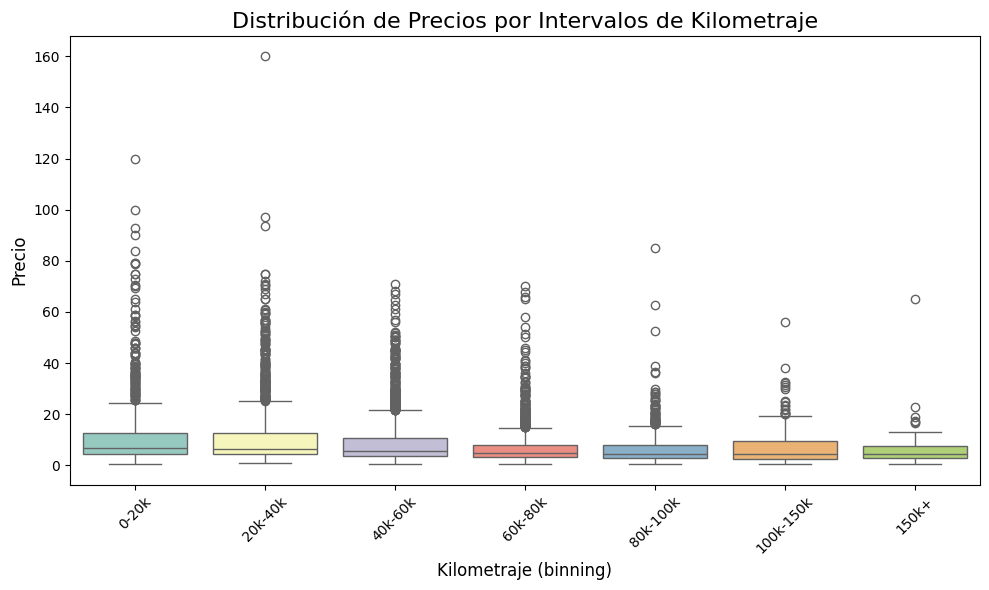

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kilometers_Binned', y='Price', data=df, palette="Set3", hue='Kilometers_Binned', legend=False)
plt.title('Distribución de Precios por Intervalos de Kilometraje', fontsize=16)
plt.xlabel('Kilometraje (binning)', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Relación entre precio y kilometraje:** En general, los precios tienden a disminuir a medida que aumenta el kilometraje, como es esperado en vehículos usados. Esto se refleja en una reducción en las medianas y los rangos intercuartílicos a lo largo de los intervalos.

**Variabilidad de los precios:** En intervalos de kilometraje más bajos (0-20k y 20k-40k), hay mayor variabilidad en los precios, como lo indican las cajas más amplias y un número significativo de valores atípicos hacia precios altos. A medida que aumenta el kilometraje (100k+), las cajas y los bigotes se vuelven más compactos, indicando menor variabilidad en los precios.

**Valores atípicos:** En todos los intervalos, existen vehículos con precios significativamente mayores al rango típico. Estos podrían corresponder a vehículos de lujo o con características especiales.

La gráfica confirma que el kilometraje tiene una relación inversa con el precio de los vehículos. Los vehículos con menor kilometraje tienen precios más altos y más dispersos, mientras que los precios son más bajos y consistentes en vehículos con kilometraje elevado. Además, los valores atípicos podrían representar modelos de alta gama o condiciones excepcionales.

Valores únicos de la variable 'Kilometers_Binned': ['60k-80k', '40k-60k', '80k-100k', '20k-40k', '100k-150k', '150k+', '0-20k']
Categories (7, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k-150k' < '150k+']
                             sum_sq      df          F        PR(>F)
C(Kilometers_Binned)   30925.239441     6.0  42.897924  1.449379e-51
Residual              722344.747258  6012.0        NaN           NaN

Realizando test post-hoc de Tukey...
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
    0-20k 100k-150k  -6.7362    0.0  -8.7936 -4.6787   True
    0-20k     150k+  -7.4188    0.0 -10.5788 -4.2587   True
    0-20k   20k-40k  -1.8943 0.0082  -3.4853 -0.3033   True
    0-20k   40k-60k  -3.8324    0.0  -5.3872 -2.2775   True
    0-20k   60k-80k  -6.2586    0.0  -7.8548 -4.6625   True
    0-20k  80k-100k   -6.555    0.0  -8.

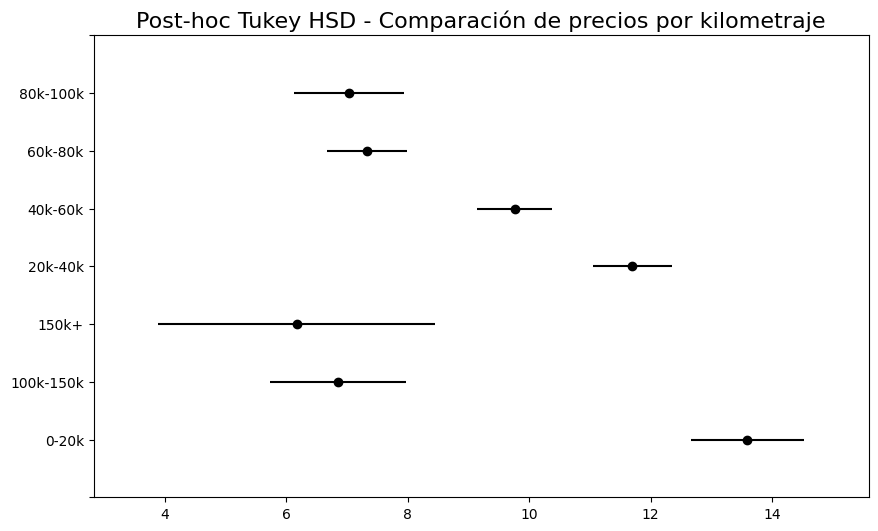

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Asegúrate de que los nombres de las columnas sean correctos y que no tengan espacios extra
df.columns = df.columns.str.strip()

# Definir las variables
variable_independiente = 'Kilometers_Driven'  # Kilometraje
variable_dependiente = 'Price'  # Precio

# Filtrar datos no nulos
df = df[[variable_independiente, variable_dependiente]].dropna()

# Crear categorías de 'Kilometers_Driven' en intervalos (puedes ajustar estos rangos según tus datos)
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']
df['Kilometers_Binned'] = pd.cut(df[variable_independiente], bins=bins, labels=labels, right=False)

# Verifica los valores únicos en los binarios
valores_unicos = df['Kilometers_Binned'].unique()
print(f"Valores únicos de la variable 'Kilometers_Binned': {valores_unicos}")

# Crear un modelo ANOVA usando OLS
modelo = ols('Price ~ C(Kilometers_Binned)', data=df).fit()
anova_result = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados de ANOVA
print(anova_result)

# Si la prueba ANOVA es significativa, realizamos un test post-hoc (Tukey)
if anova_result['PR(>F)'].iloc[0] < 0.05:
    print("\nRealizando test post-hoc de Tukey...")
    
    # Realizar el test post-hoc de Tukey
    tukey_result = pairwise_tukeyhsd(df['Price'], df['Kilometers_Binned'], alpha=0.05)
    
    # Mostrar resultados
    print(tukey_result)
    
    # Graficar resultados de Tukey
    tukey_result.plot_simultaneous()
    plt.title('Post-hoc Tukey HSD - Comparación de precios por kilometraje', fontsize=16)
    plt.show()
else:
    print("\nNo se encontraron diferencias significativas en el ANOVA, por lo que no es necesario realizar un post-hoc.")


**Diferencias significativas:** Los intervalos cuya línea no cruza el eje vertical en 𝑥 = 0 tienen diferencias significativas entre sus medias de precios.
Por ejemplo, los grupos 0-20k y 100k-150k tienen una diferencia media significativa, mientras que 100k-150k y 150k+ no muestran diferencias significativas.

**Relación entre kilometraje y precio:** Los intervalos con kilometrajes más bajos (0-20k, 20k-40k) tienden a tener precios más altos en comparación con los intervalos de kilometraje más alto (100k-150k, 150k+).

El test de Tukey confirma que las diferencias en los precios son significativas entre varios grupos de kilometraje, especialmente entre los extremos (kilometrajes bajos vs. altos). Sin embargo, algunos intervalos adyacentes, como 100k-150k y 150k+, no muestran diferencias estadísticamente significativas.

# Conclusiones del análisis

Tras el análisis realizado, se han identificado patrones claros y significativos en la relación entre el *kilometraje* y los *precios* de los coches de segunda mano. Los principales resultados son los siguientes:

1. **Relación entre kilometraje y precio:**
   - Se observa que los precios de los vehículos disminuyen a medida que aumenta el kilometraje, lo cual es un comportamiento esperado en el mercado de coches usados.
   - Este vínculo se confirmó a través de un análisis ANOVA, que evidenció diferencias significativas entre los precios medios de los distintos intervalos de kilometraje (\(F = 42.89\), \(p < 0.05\)).

2. **Diferencias notables entre grupos:**
   - Con el test post-hoc de Tukey HSD se verificó que las diferencias en los precios entre ciertos intervalos de kilometraje son estadísticamente significativas.
   - Destacan las diferencias entre los vehículos con kilometraje bajo (0-20k) y los de kilometraje elevado (100k+), donde los coches con menor kilometraje resultaron ser considerablemente más caros.

3. **Distribuciones ajustadas:**
   - El precio de los vehículos sigue una distribución exponencial, mientras que el kilometraje se ajusta mejor a una distribución Gamma, la cual es útil para modelar datos con asimetrías.
   - Este ajuste permitió una mejor comprensión de los datos y facilitó cálculos probabilísticos más precisos.

4. **Medidas estadísticas:**
   - Se calcularon medidas como la media, la varianza y sus intervalos de confianza al 95%. Los resultados muestran que los precios presentan una alta dispersión, especialmente en los vehículos con kilometraje más bajo.

El análisis confirma que el kilometraje es un factor clave que influye en el precio de los coches de segunda mano. Los vehículos con menos kilometraje suelen tener precios más altos, mientras que los coches con más kilometraje tienden a estabilizarse en precios más bajos. Este comportamiento está en línea con las expectativas del mercado y se respalda con pruebas estadísticas sólidas.